<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/Project_1_Proposal_LEVEL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.isna().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df = df.fillna(method='ffill')  # Forward fill


/tmp/ipython-input-2272778788.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill


In [ ]:
from scipy.stats import mode

print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", mode(df.select_dtypes(include=np.number), keepdims=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 ModeResult(mode=array([[ 1, 43,  4, 50, 50]]), count=array([[  1,  31, 263, 211, 115]]))

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


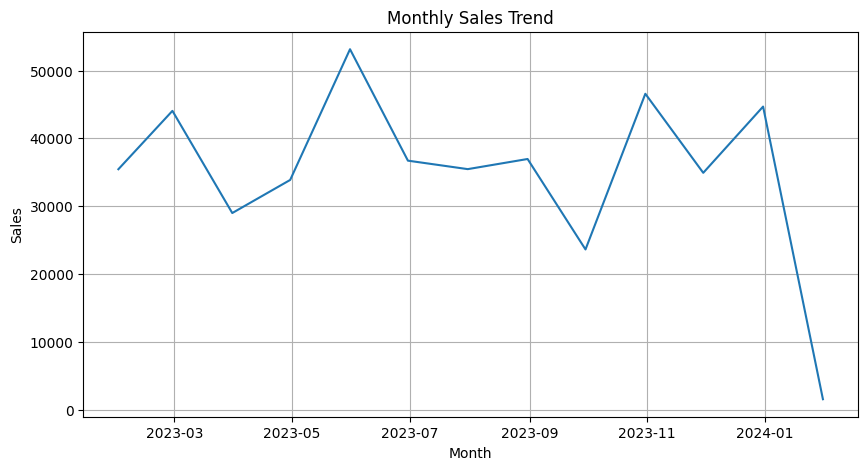

In [ ]:
monthly_sales = df.resample('ME')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()

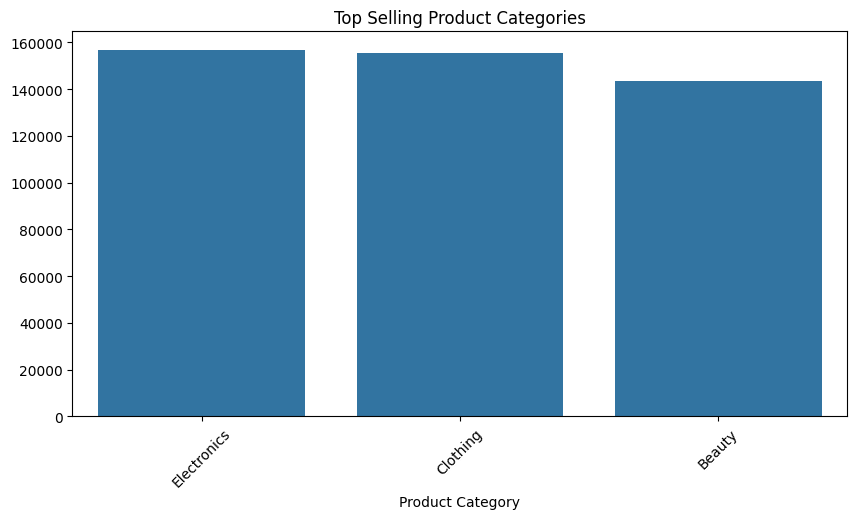

In [ ]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top Selling Product Categories")
plt.xticks(rotation=45)
plt.show()

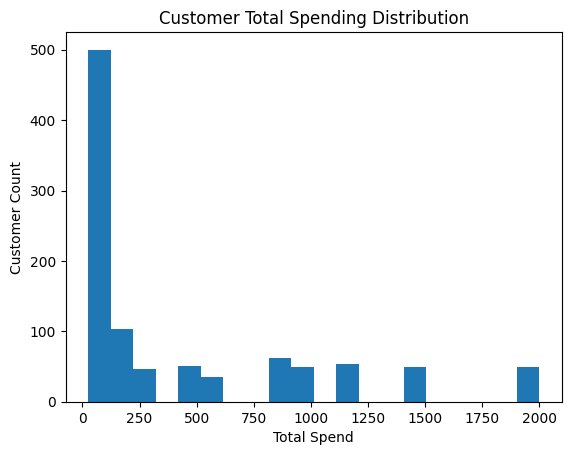

In [ ]:
customer_sales = df.groupby('Customer ID')['Total Amount'].sum()

plt.hist(customer_sales, bins=20)
plt.title("Customer Total Spending Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Customer Count")
plt.show()

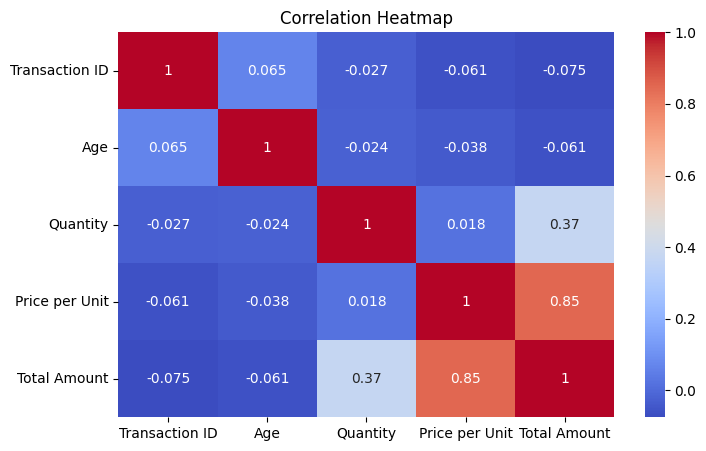

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


DATA LINK 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving menu.csv to menu.csv


In [ ]:

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.isna().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df = df.fillna(0)


In [ ]:
df = df.drop_duplicates()


In [ ]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", mode(df.select_dtypes(include=np.number), keepdims=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 ModeResult(mode=array([[ 1, 43,  4, 50, 50]]), count=array([[  1,  31, 263, 211, 115]]))

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


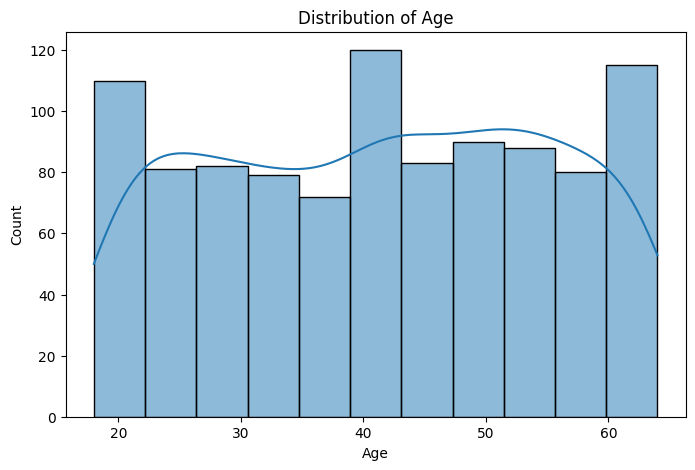

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

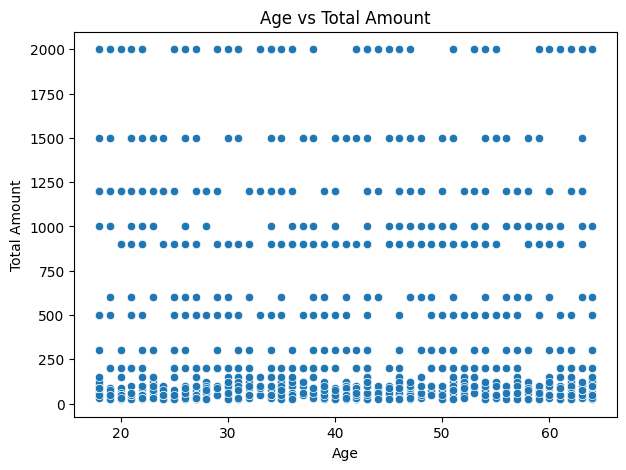

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title("Age vs Total Amount")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.show()

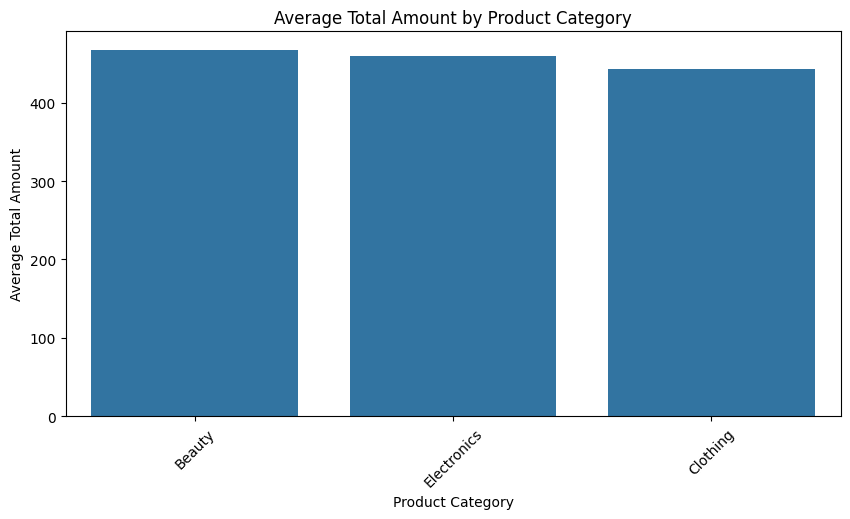

In [ ]:
category_sales = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Average Total Amount by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Average Total Amount")
plt.show()

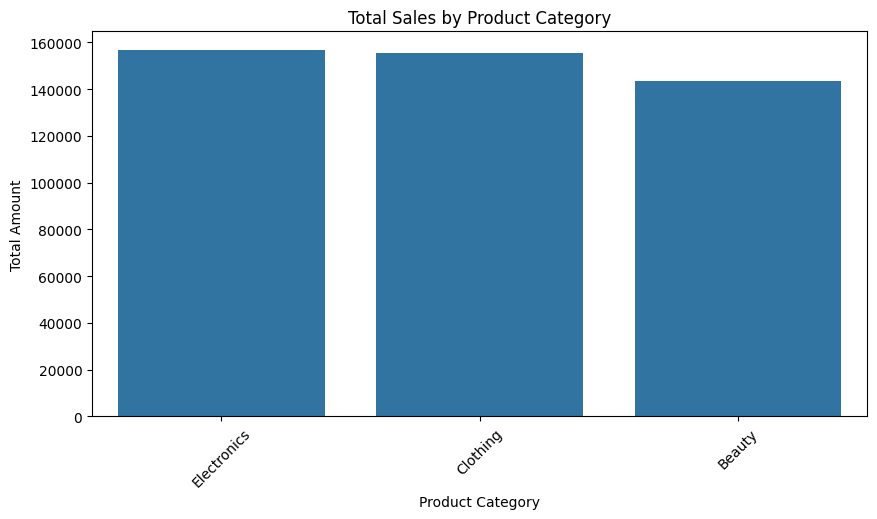

In [ ]:
category_sales_total = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales_total.index, y=category_sales_total.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

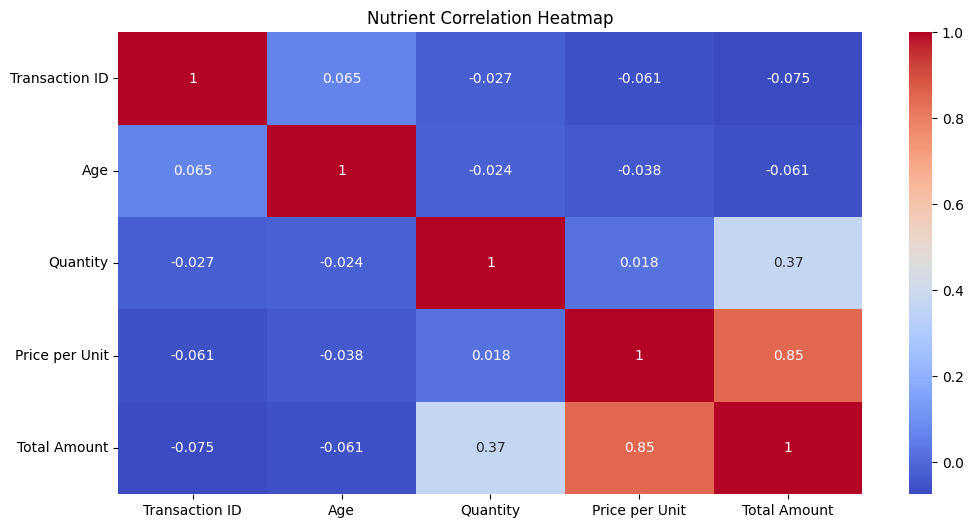

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Nutrient Correlation Heatmap")
plt.show()
